# Introduction

...

In [55]:
import sqlite3
from collections import defaultdict
import pandas as pd
import seaborn as sns

In [56]:
# Se connecter à la base de données SQLite
conn = sqlite3.connect("sqlite/articles.db")

# Créer un curseur pour exécuter des requêtes SQL
cursor = conn.cursor()

# Exemple de requête : Sélectionnez tous les articles
cursor.execute("SELECT * FROM articles INNER JOIN auteurs ON articles.auteur_id = auteurs.id")

# Récupérez tous les résultats de la requête
articles = cursor.fetchall()

conn.close()

In [57]:
articles_data = defaultdict(list)
# Afficher les articles
for article in articles:
    articles_data["ID"].append(article[0])
    articles_data["Titre"].append(article[1])
    articles_data["Auteur"].append(article[6])
    articles_data["Date"].append(article[3])
    articles_data["NB mots"].append(article[4])

In [58]:
df = pd.DataFrame(articles_data)

In [59]:
df.shape

(15, 5)

In [60]:
df.head()

,ID,Titre,Auteur,Date,NB mots
0,1,50+ New Cutting-Edge Artificial Intelligence A...,Arham Islam,2023-08-30,1326
1,2,Google DeepMind Researchers Uncover the Power ...,Rachit Ranjan,2023-08-30,657
2,3,Meet DenseDiffusion: A Training-free AI Techni...,Daniele Lorenzi,2023-08-30,684
3,4,Google Researchers Introduce RO-ViT: A Simple ...,Mohammad Arshad,2023-08-30,584
4,5,Computer Scientists from the University of Mas...,Madhur Garg,2023-08-31,551


In [61]:
df.set_index("ID", inplace=True)

In [62]:
df.head()

,Titre,Auteur,Date,NB mots
ID,,,,
1,50+ New Cutting-Edge Artificial Intelligence A...,Arham Islam,2023-08-30,1326
2,Google DeepMind Researchers Uncover the Power ...,Rachit Ranjan,2023-08-30,657
3,Meet DenseDiffusion: A Training-free AI Techni...,Daniele Lorenzi,2023-08-30,684
4,Google Researchers Introduce RO-ViT: A Simple ...,Mohammad Arshad,2023-08-30,584
5,Computer Scientists from the University of Mas...,Madhur Garg,2023-08-31,551


# Data quality

## Outliers

In [63]:
df.describe()

,NB mots
count,15.000000
mean,744.066667
std,195.372709
min,551.000000
25%,623.500000
50%,698.000000
75%,757.500000
max,1326.000000


c:\Users\User\formation\News-Scanner\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='NB mots'>

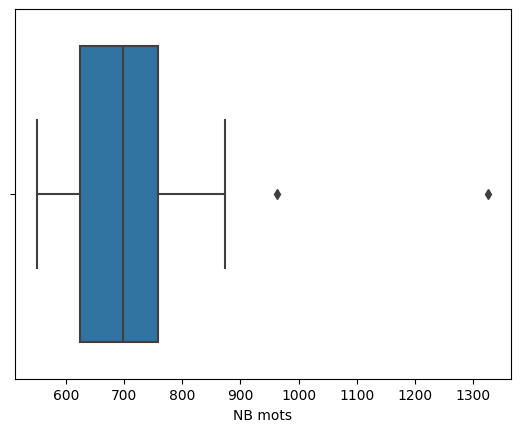

In [64]:
sns.boxplot(x=df["NB mots"])

In [65]:
df = df[df["NB mots"] <= 900]

c:\Users\User\formation\News-Scanner\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='NB mots'>

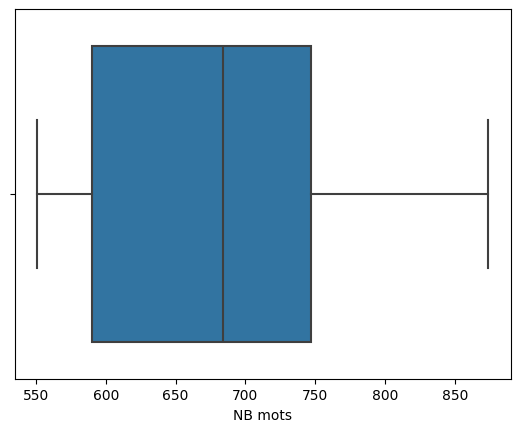

In [66]:
sns.boxplot(x=df["NB mots"])

## Missing values

In [67]:
import missingno as msno

<Axes: >

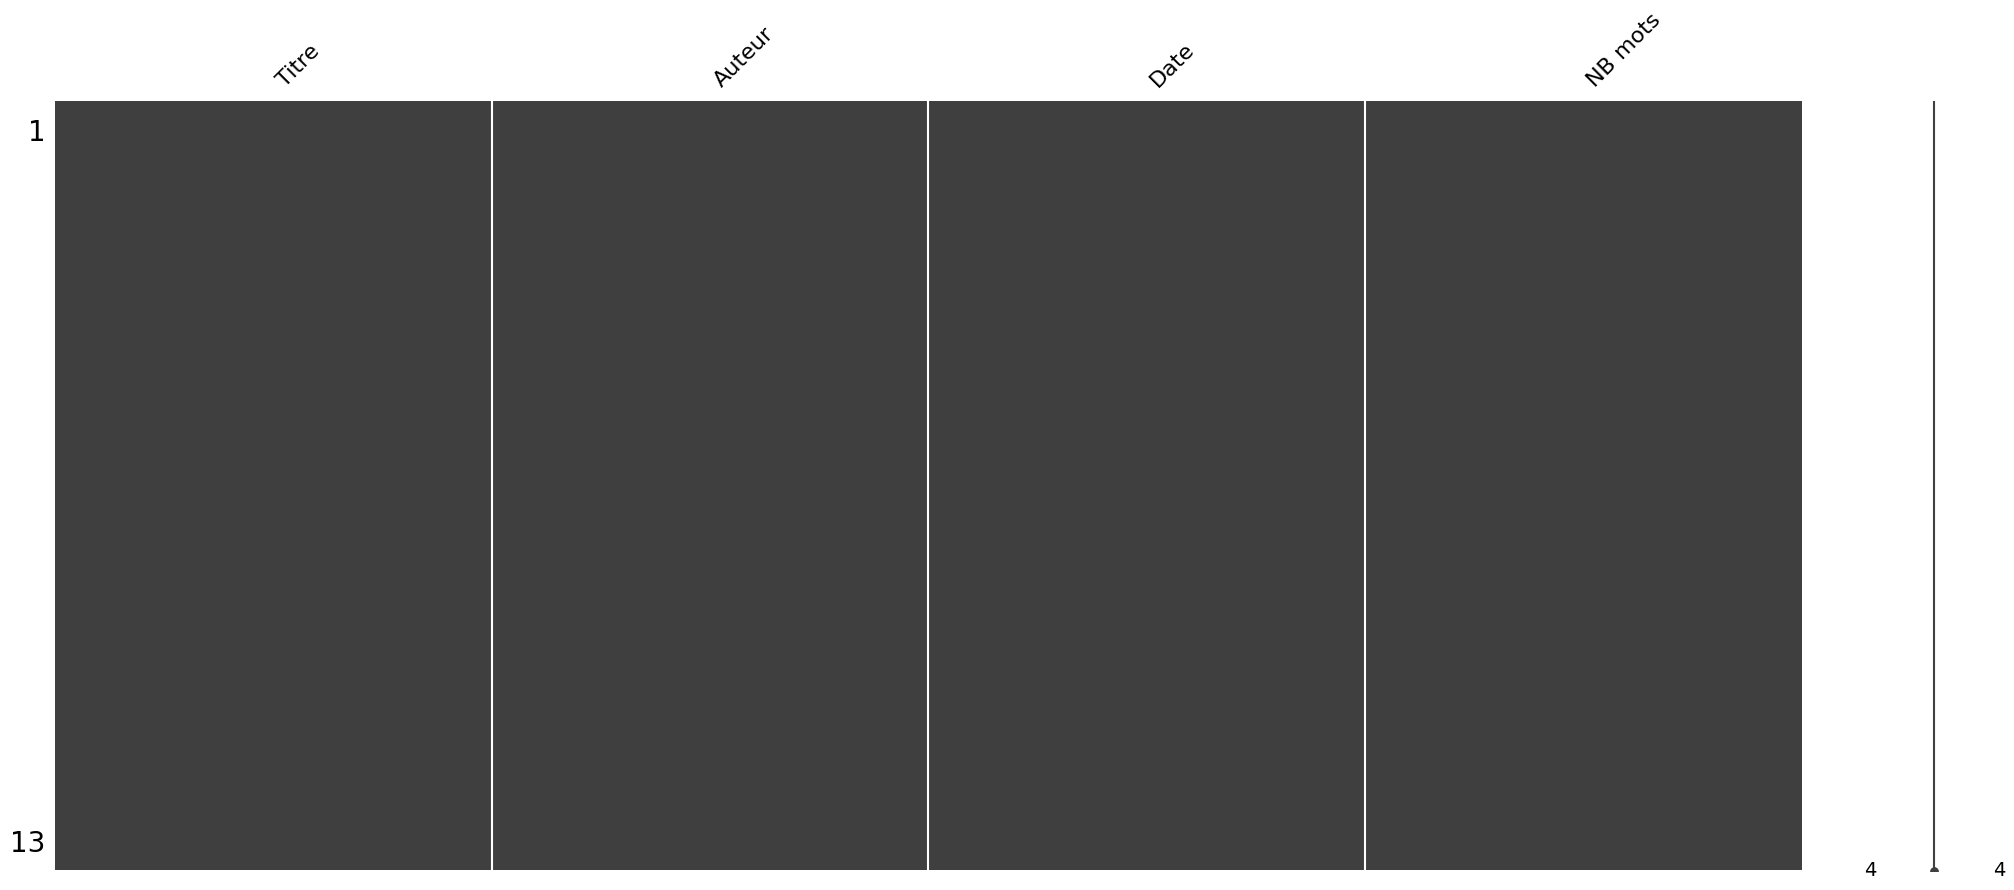

In [68]:
msno.matrix(df)

<Axes: >

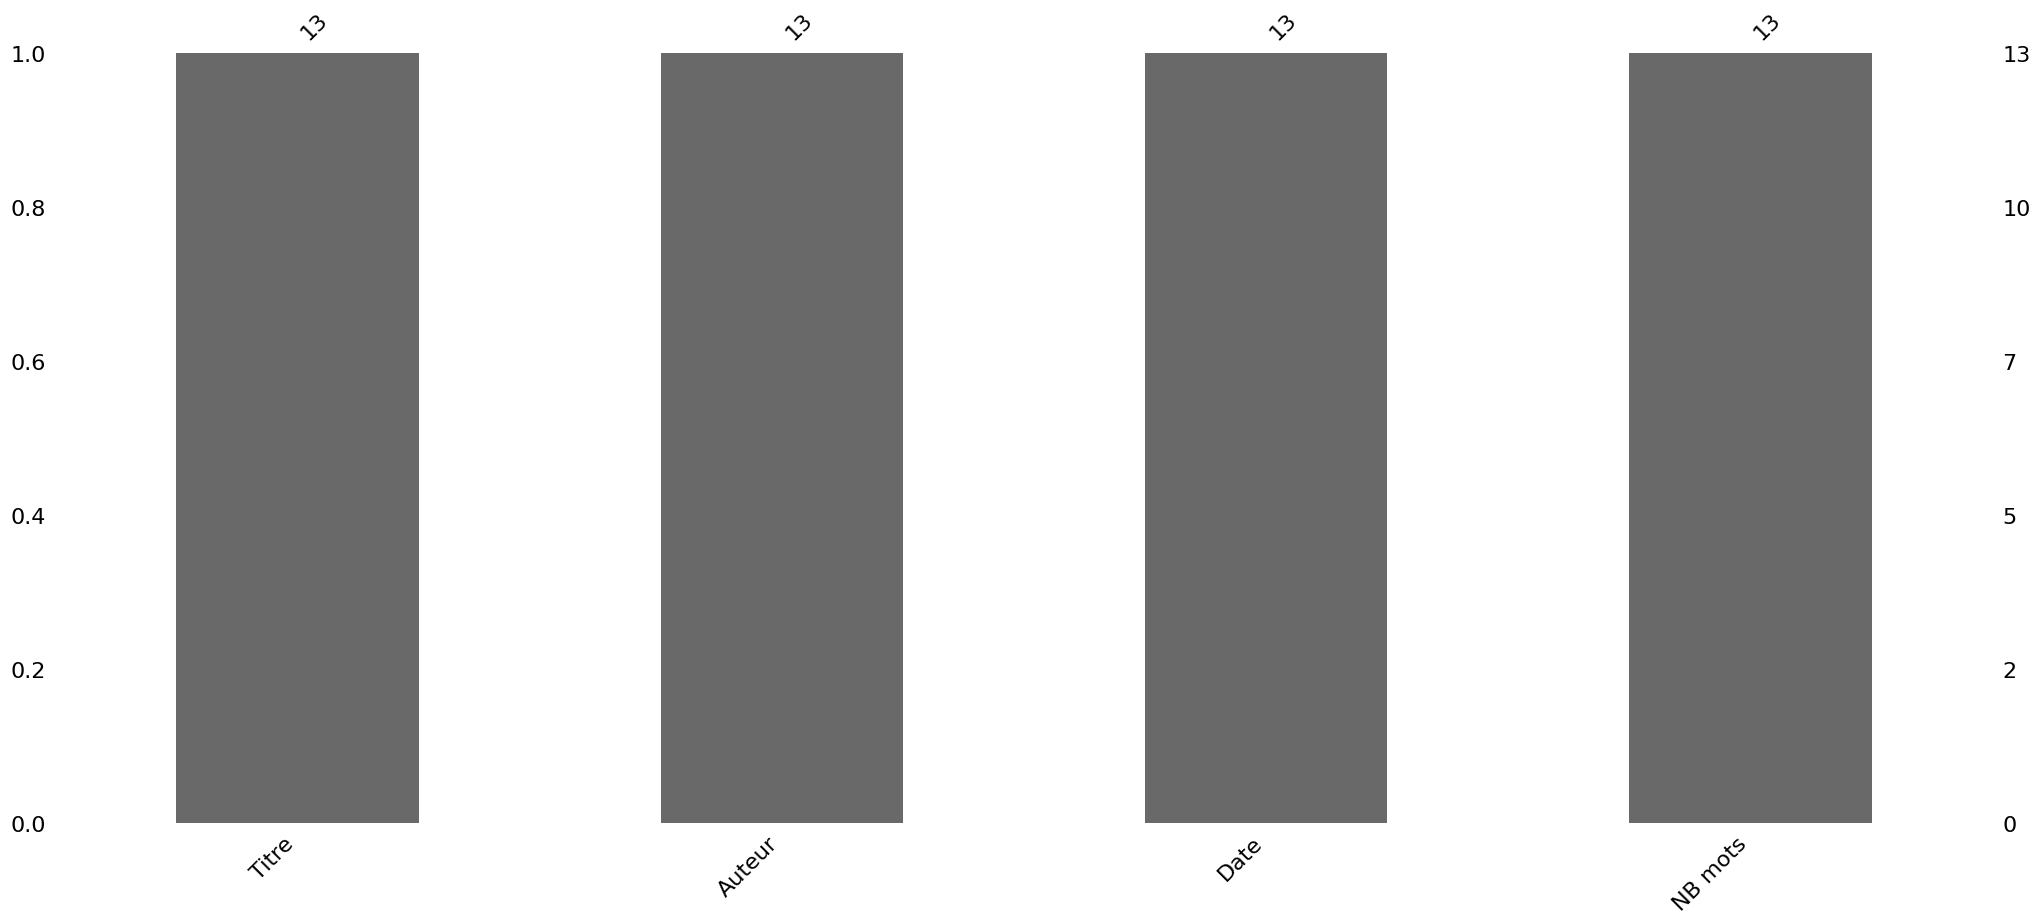

In [69]:
msno.bar(df)

## Duplicates

In [70]:
df.duplicated()

ID
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
14    False
15    False
dtype: bool

# Exploration

# Univarié

c:\Users\User\formation\News-Scanner\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\formation\News-Scanner\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='NB mots', ylabel='Count'>

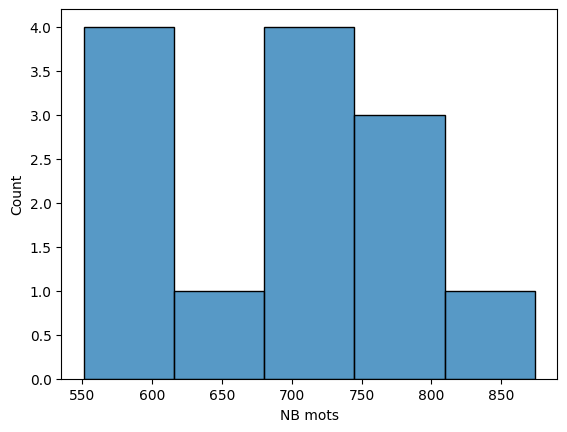

In [71]:
sns.histplot(df["NB mots"])

In [72]:
import matplotlib.pyplot as plt

In [73]:
date = df["Date"].unique()

In [74]:
df[["Date", "NB mots"]].groupby(['Date']).mean()

,NB mots
Date,
2023-08-30,641.666667
2023-08-31,551.000000
2023-09-07,700.750000
2023-09-08,759.000000
2023-09-18,696.000000
2023-09-19,747.000000


In [75]:
df["Date"].value_counts()

Date
2023-09-07    4
2023-08-30    3
2023-09-18    3
2023-08-31    1
2023-09-08    1
2023-09-19    1
Name: count, dtype: int64

In [76]:
nb_articles = df["Date"].value_counts().to_numpy()

([<matplotlib.axis.XTick at 0x1eb8541bd30>,
 [Text(0, 0, '2023-08-30'),
  Text(1, 0, '2023-08-31'),
  Text(2, 0, '2023-09-07'),
  Text(3, 0, '2023-09-08'),
  Text(4, 0, '2023-09-18'),
  Text(5, 0, '2023-09-19')])

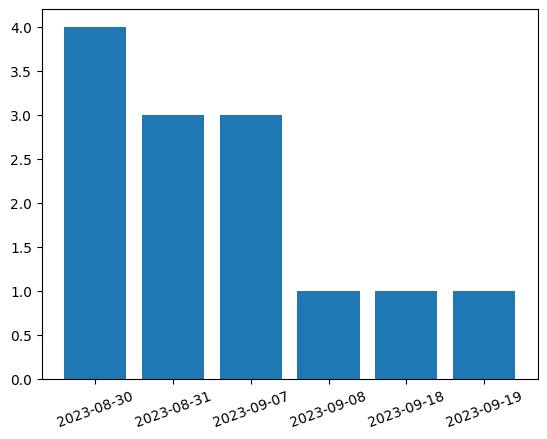

In [77]:
y_pos = list(range(len(date)))
plt.bar(y_pos, nb_articles)
plt.xticks(y_pos, date, rotation=20)

# Bivarié

In [78]:
df.head()

,Titre,Auteur,Date,NB mots
ID,,,,
2,Google DeepMind Researchers Uncover the Power ...,Rachit Ranjan,2023-08-30,657
3,Meet DenseDiffusion: A Training-free AI Techni...,Daniele Lorenzi,2023-08-30,684
4,Google Researchers Introduce RO-ViT: A Simple ...,Mohammad Arshad,2023-08-30,584
5,Computer Scientists from the University of Mas...,Madhur Garg,2023-08-31,551
6,Meet TinyLlama: A Small AI Model that Aims to ...,Niharika Singh,2023-09-07,583


In [79]:
df["nb_title"] = df.apply(lambda x: len(x["Titre"].split()), axis=1)

In [80]:
df.head()

,Titre,Auteur,Date,NB mots,nb_title
ID,,,,,
2,Google DeepMind Researchers Uncover the Power ...,Rachit Ranjan,2023-08-30,657,21
3,Meet DenseDiffusion: A Training-free AI Techni...,Daniele Lorenzi,2023-08-30,684,16
4,Google Researchers Introduce RO-ViT: A Simple ...,Mohammad Arshad,2023-08-30,584,20
5,Computer Scientists from the University of Mas...,Madhur Garg,2023-08-31,551,20
6,Meet TinyLlama: A Small AI Model that Aims to ...,Niharika Singh,2023-09-07,583,18


<Axes: xlabel='NB mots', ylabel='nb_title'>

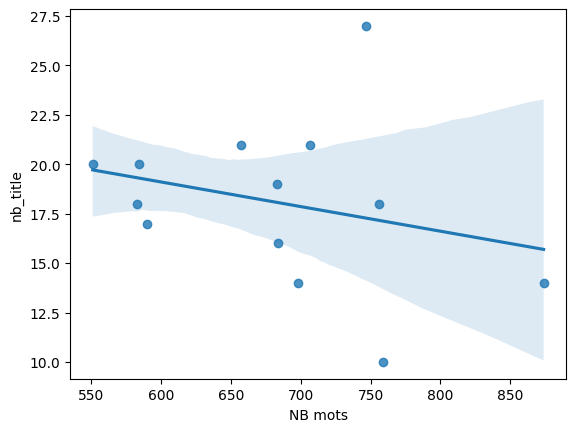

In [81]:
sns.regplot(x=df["NB mots"], y=df["nb_title"])

In [82]:
df[["NB mots", "nb_title"]].corr()

,NB mots,nb_title
NB mots,1.00000,-0.27097
nb_title,-0.27097,1.00000


<Axes: >

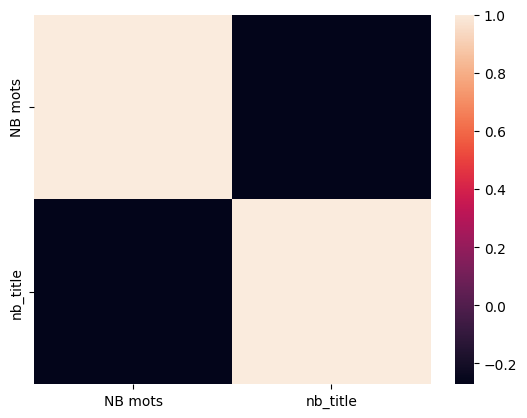

In [83]:
sns.heatmap(df[["NB mots", "nb_title"]].corr())